Desafio 44: Análise de Compras em Supermercado

📂 Dataset: Informações de 250 clientes e seus gastos em diferentes categorias no supermercado.
Colunas: Cliente, Idade, Gasto_Alimentos, Gasto_Limpeza, Gasto_Bebidas, Gasto_Total, Gastador (1 se Gasto_Total > 400, caso contrário 0)

🎯 Tarefas:

Qual é a média de gasto total por cliente?

Qual categoria (alimentos, limpeza ou bebidas) apresenta o maior gasto médio?

Qual é a faixa etária dos 10 clientes com maiores gastos totais?

Crie um gráfico de barras comparando os gastos médios por categoria.

Há correlação entre idade e gasto total?

Treine um modelo de classificação (como Árvore de Decisão ou Regressão Logística) para prever a variável Gastador.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
df = pd.read_csv("dia_44_supermercado_ML.csv")
df.head()

,Cliente,Idade,Gasto_Alimentos,Gasto_Limpeza,Gasto_Bebidas,Gasto_Total,Gastador
0,Cliente_1,59,184.20,46.67,82.28,313.15,0
1,Cliente_2,47,157.45,82.99,104.10,344.53,0
2,Cliente_3,59,212.56,62.20,99.22,373.98,0
3,Cliente_4,65,210.61,84.43,109.16,404.20,1
4,Cliente_5,45,284.44,130.57,90.37,505.37,1


In [12]:
#Qual é a média de gasto total por cliente?
mediaGastoTotalCliente = df['Gasto_Total'].mean().round(2)
print(mediaGastoTotalCliente)

421.15


In [11]:
#Qual categoria (alimentos, limpeza ou bebidas) apresenta o maior gasto médio?
gastoMedioCategoria = df[["Gasto_Alimentos", "Gasto_Limpeza", "Gasto_Bebidas"]].mean()
print(gastoMedioCategoria)

Gasto_Alimentos    249.84656
Gasto_Limpeza       81.72836
Gasto_Bebidas       89.57956
dtype: float64


In [25]:
#Qual é a faixa etária dos 10 clientes com maiores gastos totais?
gastoTotalCliente10 = df.sort_values(by="Gasto_Total", ascending=False).head(10)
print(gastoTotalCliente10[["Cliente", "Idade", "Gasto_Total"]])

         Cliente  Idade  Gasto_Total
167  Cliente_168     29       598.75
64    Cliente_65     23       596.93
203  Cliente_204     48       577.54
15    Cliente_16     62       572.88
211  Cliente_212     65       568.81
242  Cliente_243     31       559.16
237  Cliente_238     21       557.94
143  Cliente_144     43       557.51
202  Cliente_203     35       555.05
121  Cliente_122     67       549.38


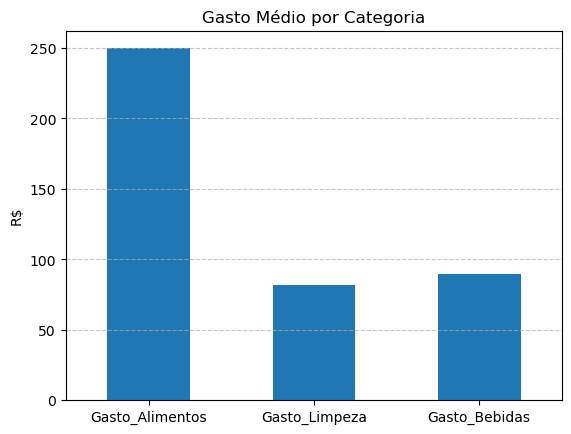

In [30]:
#Crie um gráfico de barras comparando os gastos médios por categoria.
gastoMedioCategoria.plot(kind="bar")
plt.title('Gasto Médio por Categoria')
plt.ylabel('R$')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
#Há correlação entre idade e gasto total?
corrIdadeGastoTotal = df["Idade"].corr(df["Gasto_Total"])
print(corrIdadeGastoTotal)

0.05052028847097915


In [38]:
#Treine um modelo de classificação (como Árvore de Decisão ou Regressão Logística) para prever a variável Gastador.
X = df.drop(["Gastador", "Cliente"], axis=1)
y = df["Gastador"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 1.0
